<a href="https://colab.research.google.com/github/letizia-z/Vocab-growth-through-short-stories/blob/main/Acquire_L2_words_from_consuming_content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|     Course                     | Academic Year |
|    :---                        |     ---:      |
| Programming for the Humanities |  *2023/2024*  |

*This has been my first programming course.*

# HOW MANY WORDS CAN I ACQUIRE FROM CONSUMING CONTENT IN L2

### Project Description

This project uses Python to perform linguistic analysis on three short stories. The goal is to extract useful information regarding the complexity and variety of the language used in the texts, as well as the number of occurrences of each word. This tool is particularly useful for those who want to deepen their linguistic understanding and improve their vocabulary through the consumption of content in the target language.

* **Input data:** three short stories in English
* **Output data:** sentence, word, and syllable count; Flesch-Kincaid score and reading difficulty; vocabulary variety; possible encounter with new words and passively learnable words (i.e., those that exceed a certain number of occurrences within the texts).


### Name and URL of programs/notebooks reused in the project

|Name|URL|
| :---        |    :---  |
|*Python*|*Notebooks from lectures, especially "09_NLP"*|
||*https://www.datacamp.com/tutorial/sort-a-dictionary-by-value-python*|
|*Spacy*|*https://spacy.io/api/doc*|
||https://stackoverflow.com/questions/405161/detecting-syllables-in-a-word|
|*Matplotlib.pyplot* |*https://matplotlib.org/stable/api/pyplot_summary.html*|
||*https://stackoverflow.com/questions/66446687/how-do-i-make-a-dashed-horizontal-line-with-matplotlib* |
|*Artificial Intelligence*|*ChatGPT, Gemini*|

*This code was developed with the assistance of artificial intelligence (AI) tools to generate a starting point or suggestions. However, the final code has been reviewed, modified, and adapted according to my specific needs, and represents the result of personal work. Any similarities with other works are purely coincidental and unintentional. I have taken all necessary precautions to ensure that the code presented here does not constitute plagiarism and respects copyright laws.*


---

# 1. INTRODUCTION

Anyone who has seriously studied a foreign language has likely experienced the so-called ***“language learning plateau”*** — that moment when you already have enough vocabulary to understand and express more or less everything you want, making it increasingly difficult to learn new words.
To overcome this plateau, reading or generally increasing your consumption of content in the target language is often recommended.
With this in mind, I decided to analyze some texts myself to see **how effective content consumption really is**, in this case with reference to the **English language**.


## 1.1 SOME BASIC CONCEPTS

Before diving into the actual project, it's important to provide two key pieces of information.

### 1.1.1 CEFR LEVELS
Each language proficiency level includes an approximate number of words that are known and usable by the speaker. Therefore, depending on one's starting level, there will be differences in the time needed to understand a text and in the number of words that can be learned from it.

| LEVEL | WORDS | HOURS |
| --- | --- | --- |
| A1 | 700 | 100 |
| A2 | 1500 | 180/200 |
| B1 | 2500 | 350/400 |
| B2 | 4000 | 500/600 |
| C1 | 8000 | 700/800 |
| C2 | 16000 | 1000/1200 |

### 1.1.2 VOCABULARY ACQUISITION

Simply encountering a word in a text is obviously not enough to learn it. When it comes to learning a new word, we can take two main approaches:

* **Active learning**, where the student who comes across a new term makes a conscious effort to remember it (for example, by using flashcards)
* **Passive acquisition**, which relies primarily on repeated exposure to the same word, ideally in different contexts

Most studies in this field focus on first language (L1) acquisition rather than second language (L2) learning. This is partly because it is still unclear how many exposures are needed to acquire a word, as this also depends on individual cognitive abilities.

According to Uchihara et al.:

> *“the number of encounters necessary to learn words rang\[es] from 6, 10, 12, to more than 20 times. \[That is to say,] the number of encounters necessary for learning of vocabulary to occur during meaning-focussed input remains unclear”*

Therefore, for the purposes of my project, I decided to assume that the **minimum number of exposures required for passive vocabulary acquisition is 12**, based in part on a study by Holly L. Storkel et al. on L1 acquisition in children.



---

# 2. THE SHORT STORIES

First, I selected three short stories that I was unfamiliar with, written by authors from different time periods, genders, and styles. The idea behind this choice was that **greater variety** would allow for the encounter of the largest possible number of different words. This is ideal from the perspective of *active vocabulary study*, but it could be problematic for *passive acquisition*, since a wider vocabulary range would likely result in fewer words reaching the 12-occurrence threshold.

The short stories analyzed are:

* *“The Yellow Wallpaper”* by C. P. Gilman (1892)
* *“Hills Like White Elephants”* by E. Hemingway (1927)
* *“A Good Man is Hard to Find”* by F. O’Connor (1953)



> Note: make sure to manually download them in your personal Colab space and runtime



## 2.1 IMPORTING AND OPENING THE FILES

First, we'll need to open the files of the selected short stories, so we can begin analyzing them. To make sure I’ve opened the correct files, I’ll also print the first 100 characters of each one.

To distinguish between the three texts, we’ll add the initial of each author’s last name to the variable names:

* **O** = *“A Good Man is Hard to Find”* by F. O’Connor (1953)
* **H** = *“Hills Like White Elephants”* by E. Hemingway (1927)
* **G** = *“The Yellow Wallpaper”* by C. P. Gilman (1892)


In [1]:
def readFile(filePath):
  with open(filePath, 'r', encoding='utf-8') as file:
    return file.read()


filePathO = 'AGoodManIsHardToFind_OConnor1953.txt'
filePathH = 'HillsLikeWhiteElephants_Hemingway1927.txt'
filePathG = 'TheYellowWallpaper_Gillman1892.txt'

rawTextO = readFile(filePathO)
rawTextH = readFile(filePathH)
rawTextG = readFile(filePathG)

print(str(rawTextO[:100]) + '\n')
print(str(rawTextH[:100]) + '\n')
print(str(rawTextG[:100]) + '\n')


﻿A GOOD MAN IS HARD TO FIND
Flannery O’Connor, 1953
The grandmother didn’t want to go to Florida. Sh

﻿HILLS LIKE WHITE ELEPHANTS
Ernest Hemingway, 1927 
The hills across the valley of the Ebro were lon

﻿THE YELLOW WALLPAPER
Charlotte Perkins Gillman, 1892
It is very seldom that mere ordinary people li



### 2.1.1 EXTRACTING THE TITLE

I also decided to take advantage of the formatting of these files (with the title written in uppercase) to create a function that extracts only the title of the short story. This way, we can easily refer back to it in later stages, especially when displaying the results of the various analysis steps.

In [2]:
def extractTitle(filePath):
  with open(filePath, 'r', encoding='utf-8') as file:
    for line in file:
      strippedLine = line.strip() # remove blank spaces at the beginning and at the end of the line
      if strippedLine.isupper(): # the title is supposedly in uppercase
        return strippedLine
  return 'Title not found'  # in cas the title isn't in uppercase like expected

titleO = extractTitle(filePathO)
print(str(titleO) + '\n')

titleH = extractTitle(filePathH)
print(str(titleH) + '\n')

titleG = extractTitle(filePathG)
print(str(titleG) + '\n')

﻿A GOOD MAN IS HARD TO FIND

﻿HILLS LIKE WHITE ELEPHANTS

﻿THE YELLOW WALLPAPER



## 2.2 PREPROCESSING

One last necessary step is preprocessing the text by making slight modifications to simplify the subsequent analysis:

* Convert the entire text to **lowercase**: this ensures that during co-occurrence counting, identical words are counted together (1), rather than being treated as separate groups due to capitalization
* Remove **apostrophes**: I encountered issues related to apostrophes during tokenization, so I decided to remove them immediately, verifying that this neither affected tokenization nor influenced the later counts (2)

In [3]:
def preprocess(text):
  text = text.lower() #(1)
  text = text.replace('’', '') #(2)
  return text

textO = preprocess(rawTextO)
textH = preprocess(rawTextH)
textG = preprocess(rawTextG)

print(str(textO[:100]) + '\n')
print(str(textH[:100]) + '\n')
print(str(textG[:100]) + '\n')

﻿a good man is hard to find
flannery oconnor, 1953
the grandmother didnt want to go to florida. she 

﻿hills like white elephants
ernest hemingway, 1927 
the hills across the valley of the ebro were lon

﻿the yellow wallpaper
charlotte perkins gillman, 1892
it is very seldom that mere ordinary people li




---
# 3. FLESCH-KINCAID READABILITY

The first thing we want to do is determine which text would be best to read first, moving from the easiest to the most difficult in order to **gradually build our vocabulary**.
To do this, for English we can use the Flesch-Kincaid Grade Level Formula:

$$
0.39 \cdot \frac{\text{total words}}{\text{total sentences}} + 11.8 \cdot \frac{\text{total syllables}}{\text{total words}} - 15.59
$$


## 3.1 CALCULATING THE VALUES

From the formula, we see that we need to calculate three values:

* Total sentences (`totalSentences`)
* Total words (`totalWords`)
* Total syllables (`totalSyllables`)

To do this, we’ll use the `spaCy` library, downloading its English language model.

In [4]:
!pip install spacy

import spacy
nlp = spacy.load('en_core_web_sm')

## 3.1.1 TOTAL WORDS
While drafting the project, I decided to start with word tokenization, so that I could immediately spot any potential errors that might also affect later stages of the analysis. In fact, this turned out to be one of the steps where I encountered the most challenges.

Knowing that I would eventually need proper word tokenization for later steps, I decided to create a function dedicated solely to that task. I then obtained the total number of tokens simply by printing the result with a `len()` call outside the function.


However, during this first tokenization attempt, I noticed two main issues:

1. A `\ufeff` character (BOM – Byte Order Mark) appeared at the beginning of the text
2. Punctuation and line breaks were being counted as tokens, even though I only wanted to include **words and numbers**


To address these issues:

* I started tokenization from the first word after any potential BOM
  * Using `.remove` would not be suitable, as it would also remove the first word after the BOM — in this case, the word "A" (3)
* I defined the function so that it would only add to the token list those strings that consist entirely of letters (4)

> *Note:* the use of `token.is_alpha` filters out all tokens containing apostrophes — including the author's name ("O'Connor"). This problem was already resolved during the **preprocessing phase** (see 2.2.1).

The final function is therefore as follows:

In [5]:
def tokenizeWords(text):
  if text.startswith('\ufeff'): #(3)
    text = text[1:]

  doc = nlp(text)
  words = []
  for token in doc:
    if token.is_alpha: #(4)
      words.append(token.text)
  return words

tokensO = tokenizeWords(textO)
totalWordsO = len(tokensO)
print(tokensO)
print('Total words: ' + str(totalWordsO)+ '\n')

tokensH = tokenizeWords(textH)
totalWordsH = len(tokensH)
print(tokensH)
print('Total words: ' + str(totalWordsH) + '\n')

tokensG = tokenizeWords(textG)
totalWordsG = len(tokensG)
print(tokensG)
print('Total words: ' + str(totalWordsG)+ '\n')

['a', 'good', 'man', 'is', 'hard', 'to', 'find', 'flannery', 'oconnor', 'the', 'grandmother', 'did', 'nt', 'want', 'to', 'go', 'to', 'florida', 'she', 'wanted', 'to', 'visit', 'some', 'of', 'her', 'connections', 'in', 'east', 'tennessee', 'and', 'she', 'was', 'seizing', 'at', 'every', 'chance', 'to', 'change', 'baileys', 'mind', 'bailey', 'was', 'the', 'son', 'she', 'lived', 'with', 'her', 'only', 'boy', 'he', 'was', 'sitting', 'on', 'the', 'edge', 'of', 'his', 'chair', 'at', 'the', 'table', 'bent', 'over', 'the', 'orange', 'sports', 'section', 'of', 'the', 'journal', 'now', 'look', 'here', 'bailey', 'she', 'said', 'see', 'here', 'read', 'this', 'and', 'she', 'stood', 'with', 'one', 'hand', 'on', 'her', 'thin', 'hip', 'and', 'the', 'other', 'rattling', 'the', 'newspaper', 'at', 'his', 'bald', 'head', 'here', 'this', 'fellow', 'that', 'calls', 'himself', 'the', 'misfit', 'is', 'aloose', 'from', 'the', 'federal', 'pen', 'and', 'headed', 'toward', 'florida', 'and', 'you', 'read', 'here', 

This way, we also see that all contractions reappear (e.g., `'not'` becomes `'nt'`), as they are still recognized as individual tokens despite the absence of the apostrophe.

In this regard, the only two letters that could pose issues are **'d'** (from *would*, *had*) and especially **'s'**. After checking, I observed the following:

* **'d'** is always treated as a separate token
* **'s'** is treated as a separate token **only** when it follows *wh-* or *th-* words. In contrast, in words like *its*, *lets*, or proper nouns, it’s interpreted as a plural, third person singular verb, or pronoun — and thus **merged with the preceding word**

  * Regarding this, I figured that distinguishing the **Saxon genitive** from a plural word wasn’t particularly necessary for the purpose of estimating **reading difficulty**, since it’s one of the first things learners pick up and doesn't have a meaningful standalone form
  * The same applies to **verbs** — especially since in the lemmatization step (*see 4.1 Lemmatization*) we already know that the verb *to be* will appear countless times (thus enough to be considered), and plurals will be lemmatized to their singular form regardless

In short, I decided these distinctions weren’t relevant enough to justify more complex filtering at this stage.

## 3.1.2 TOTAL SYLLABLES
To count the syllables, I used an additional spaCy pipeline called `spacy_syllables`.

In [6]:
!pip install spacy spacy_syllables

import spacy_syllables
nlp.add_pipe('syllables')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.3 MB/s eta 0:00:00



This function relies on the `._.syllable_count` method (5) to compute the number of syllables.

In [7]:
def countSyllables(text):
  doc = nlp(text)
  totalSyllables = 0
  for token in doc:
    if token.is_alpha: # only count alphabet characters as tokens
      count = token._.syllables_count #(5)
      totalSyllables += count
  return totalSyllables

totalSyllablesO = countSyllables(textO)
print(titleO + ': '  + str(totalSyllablesO) + ' syllables in total \n')

totalSyllablesH = countSyllables(textH)
print(titleH + ': '  + str(totalSyllablesH) + ' syllables in total \n')

totalSyllablesG = countSyllables(textG)
print(titleG + ': '  + str(totalSyllablesG) + ' syllables in total \n')

﻿A GOOD MAN IS HARD TO FIND: 8126 syllables in total 

﻿HILLS LIKE WHITE ELEPHANTS: 1684 syllables in total 

﻿THE YELLOW WALLPAPER: 7541 syllables in total 



### 3.1.3 TOTAL SENTENCES

Finally, we simply apply the `doc.sents` property to split the text into individual sentences. These sentences are added to the `sentences` list, and the function returns only the length of that list, as the actual sentence content is not needed in this case.

In the function `countSentences(text)`:

1. spaCy processes the text by creating a `doc` object, which is essentially a [sequence of tokens](https://spacy.io/api/doc)
2. The `doc.sents` property splits the text into sentences
3. The `sent.text` attribute is used to access the individual sentences
4. The sentences are added to the `sentences` list using the `.append()` method
5. The function returns only the `len` of the list — i.e., the number of sentences detected in the text


In [8]:
def countSentences(text):
  doc = nlp(text)
  sentences = []
  for sent in doc.sents:
    if sent.text:
      sentences.append(sent.text)
  return len(sentences)

totalSentencesO = countSentences(textO)
print(titleO + ': '  + str(totalSentencesO) + ' sentences in total \n')

totalSentencesH = countSentences(textH)
print(titleH + ': '  + str(totalSentencesH) + ' sentences in total \n')

totalSentencesG = countSentences(textG)
print(titleG + ': '  + str(totalSentencesG) + ' sentences in total \n')

﻿A GOOD MAN IS HARD TO FIND: 420 sentences in total 

﻿HILLS LIKE WHITE ELEPHANTS: 160 sentences in total 

﻿THE YELLOW WALLPAPER: 376 sentences in total 



## 3.2 READING DIFFICULTY RANKING

Once all the required values have been calculated, we simply plug them into the **Flesch-Kincaid formula** to create a ranking of the texts — from the easiest to the most complex.


### 3.2.1 CALCULATING READABILITY

By applying the formula *(see section 3. Flesch-Kincaid Readability)*, the result should be a **value between 0 and 18**, which corresponds to increasing levels of difficulty based on the U.S. school grade system.

| Value | School Level | Student Age Range | Notes |
| :---  |     :---     |       :---        | :---  |
|0-1    | Pre-Kindergarten -- 1st grade | 3-7 | Basic level for those who just learned to read books. |
|1-5    | 1st grade -- 5th grade | 7-11 | Very easy to read. |
|5-11   | 5th grade -- 11th grade | 11-17 | Average level. Good for the majority of marketing materials. |
|11-18  | 11th grade -- 18th grade | 17 and above | The text is for skilled readers. For example, an academic paper. |


In [9]:
def calcReadability(totalSentences, totalWords, totalSyllables):
  readability = 0.39 * (totalWords/totalSentences) + 11.8 * (totalSyllables/totalWords) - 15.59
  return f'{readability:.3f}'

print('FLESCH-KINCAID VALUE: \n')

readabilityO = calcReadability(totalSentencesO, totalWordsO, totalSyllablesO)
print(titleO + ': '  + readabilityO + '\n')

readabilityH = calcReadability(totalSentencesH, totalWordsH, totalSyllablesH)
print(titleH + ': '  + readabilityH + '\n')

readabilityG = calcReadability(totalSentencesG, totalWordsG, totalSyllablesG)
print(titleG + ': '  + readabilityG + '\n')

FLESCH-KINCAID VALUE: 

﻿A GOOD MAN IS HARD TO FIND: 5.081

﻿HILLS LIKE WHITE ELEPHANTS: 1.538

﻿THE YELLOW WALLPAPER: 5.272



### 3.2.2 CONVERTING READABILITY INTO DIFFICULTY LEVEL

We can then create an additional function that automatically tells us the corresponding difficulty level based on the previously calculated Flesch-Kincaid score.


In [10]:
def difficulty(readability):
  if 0 <= float(readability) < 2: #The previous f-string transformed this value in a string type, so I need to convert it back to a number
    level = 'Absolute Beginner'
  elif float(readability) < 6:
    level = 'Beginner'
  elif float(readability) < 12:
    level = 'Intermediate'
  elif float(readability) < 19:
    level = 'Advanced'
  else: # meaning readability < 0 || readability > 18
    level = 'Attention! Value not included in the Flesch-Kincaid Scale'

  return level

print('LEVEL OF DIFFICULTY: \n')

difficultyO = difficulty(readabilityO)
print(titleO + ': '  + str(difficultyO) + '\n')

difficultyH = difficulty(readabilityH)
print(titleH + ': '  + str(difficultyH) + '\n')

difficultyG = difficulty(readabilityG)
print(titleG + ': '  + str(difficultyG) + '\n')

LEVEL OF DIFFICULTY: 

﻿A GOOD MAN IS HARD TO FIND: Beginner

﻿HILLS LIKE WHITE ELEPHANTS: Absolute Beginner

﻿THE YELLOW WALLPAPER: Beginner



## 3.3 INITIAL RESULTS: Readability Comparison

Finally, we compile all the values calculated so far into a single block, so we can **compare** them and determine the best reading order for a more gradual and effective learning experience.


In [11]:
def partialInfos(title, totalSents, totalWords, totalSyllables, readability, difficulty):
  print('\"' + title + '\"')
  print('Number of sentences: ' + str(totalSents))
  print('Number of words: ' + str(totalWords))
  print('Number of syllables: ' + str(totalSyllables))
  print('Flesch-Kincaid value: ' + str(readability))
  print('Level of difficulty: ' + difficulty)
  return '\n'

partialInfosO = partialInfos(titleO, totalSentencesO, totalWordsO, totalSyllablesO, readabilityO, difficultyO)
print(partialInfosO)

partialInfosH = partialInfos(titleH, totalSentencesH, totalWordsH, totalSyllablesH, readabilityH, difficultyH)
print(partialInfosH)

partialInfosG = partialInfos(titleG, totalSentencesG, totalWordsG, totalSyllablesG, readabilityG, difficultyG)
print(partialInfosG)

"﻿A GOOD MAN IS HARD TO FIND"
Number of sentences: 420
Number of words: 6589
Number of syllables: 8126
Flesch-Kincaid value: 5.081
Level of difficulty: Beginner


"﻿HILLS LIKE WHITE ELEPHANTS"
Number of sentences: 160
Number of words: 1466
Number of syllables: 1684
Flesch-Kincaid value: 1.538
Level of difficulty: Absolute Beginner


"﻿THE YELLOW WALLPAPER"
Number of sentences: 376
Number of words: 6139
Number of syllables: 7541
Flesch-Kincaid value: 5.272
Level of difficulty: Beginner




From these results, we understand that **the best order** to read these texts would be the following:
1. Hills like White Elephants (1.26)
2. A Good Man is Hard to Find (5.06)
3.  The Yellow Wallpaper (5.25)

---

# 4. TEXT ANALYSIS

At this point, we can finally move on to analyzing the actual content of the texts. Specifically, we can:

* Build a kind of **author vocabulary** starting from `lemmas`

  * A *lemma* is the “base form” of a word — the form you'd find in a dictionary

* Analyze **lexical variety** (`vocab` / `totalWords` \* 100)

  * `vocab` works like `lemmas`, but filters out repeated occurrences
  * `totalWordsX = len(tokensX)`

* Count the **number of occurrences of each word** (`lemmas`) to identify which ones we could potentially learn through passive exposure
  *(see section 1.1.2 Vocabulary Acquisition)*

  * The result will be a dictionary of the form `{lemma: number of occurrences}`


## 4.1 LEMMATIZATION

To create a list of the vocabulary used by the author from our tokens, we first want to convert each individual word to its **base form**, also known as the *lemma*.

> Since the function takes about a minute to return results for each text, I chose to separate them into individual blocks.

In [12]:
def lemmatize(tokens):
  lemmas = []
  for token in tokens:
    lemma = nlp(token)[0].lemma_ #the [0] index is necessary to run through all the elements, otherwise it will stop after the first item
    lemmas.append(lemma)
  return lemmas

lemmasH = lemmatize(tokensH)
print(lemmasH)

['hill', 'like', 'white', 'elephant', 'ern', 'hemingway', 'the', 'hill', 'across', 'the', 'valley', 'of', 'the', 'ebro', 'be', 'long', 'and', 'white', 'on', 'this', 'side', 'there', 'be', 'no', 'shade', 'and', 'no', 'tree', 'and', 'the', 'station', 'be', 'between', 'two', 'line', 'of', 'rail', 'in', 'the', 'sun', 'close', 'against', 'the', 'side', 'of', 'the', 'station', 'there', 'be', 'the', 'warm', 'shadow', 'of', 'the', 'build', 'and', 'a', 'curtain', 'make', 'of', 'string', 'of', 'bamboo', 'bead', 'hung', 'across', 'the', 'open', 'door', 'into', 'the', 'bar', 'to', 'keep', 'out', 'fly', 'the', 'american', 'and', 'the', 'girl', 'with', 'he', 'sit', 'at', 'a', 'table', 'in', 'the', 'shade', 'outside', 'the', 'build', 'it', 'be', 'very', 'hot', 'and', 'the', 'express', 'from', 'barcelona', 'would', 'come', 'in', 'forty', 'minute', 'it', 'stop', 'at', 'this', 'junction', 'for', 'two', 'minute', 'and', 'go', 'on', 'to', 'madrid', 'what', 'should', 'we', 'drink', 'the', 'girl', 'ask', 's

In [14]:
lemmasO = lemmatize(tokensO)
print(lemmasO)

['a', 'good', 'man', 'be', 'hard', 'to', 'find', 'flannery', 'oconnor', 'the', 'grandmother', 'do', 'not', 'want', 'to', 'go', 'to', 'florida', 'she', 'want', 'to', 'visit', 'some', 'of', 'she', 'connection', 'in', 'east', 'tennessee', 'and', 'she', 'be', 'seize', 'at', 'every', 'chance', 'to', 'change', 'bailey', 'mind', 'bailey', 'be', 'the', 'son', 'she', 'live', 'with', 'she', 'only', 'boy', 'he', 'be', 'sit', 'on', 'the', 'edge', 'of', 'his', 'chair', 'at', 'the', 'table', 'bent', 'over', 'the', 'orange', 'sport', 'section', 'of', 'the', 'journal', 'now', 'look', 'here', 'bailey', 'she', 'say', 'see', 'here', 'read', 'this', 'and', 'she', 'stand', 'with', 'one', 'hand', 'on', 'she', 'thin', 'hip', 'and', 'the', 'other', 'rattle', 'the', 'newspaper', 'at', 'his', 'bald', 'head', 'here', 'this', 'fellow', 'that', 'call', 'himself', 'the', 'misfit', 'be', 'aloose', 'from', 'the', 'federal', 'pen', 'and', 'head', 'toward', 'florida', 'and', 'you', 'read', 'here', 'what', 'it', 'say', 

In [15]:
lemmasG = lemmatize(tokensG)
print(lemmasG)

['the', 'yellow', 'wallpaper', 'charlotte', 'perkin', 'gillman', 'it', 'be', 'very', 'seldom', 'that', 'mere', 'ordinary', 'people', 'like', 'john', 'and', 'myself', 'secure', 'ancestral', 'hall', 'for', 'the', 'summer', 'a', 'colonial', 'mansion', 'a', 'hereditary', 'estate', 'I', 'would', 'say', 'a', 'haunt', 'house', 'and', 'reach', 'the', 'height', 'of', 'romantic', 'felicity', 'but', 'that', 'would', 'be', 'ask', 'too', 'much', 'of', 'fate', 'still', 'I', 'will', 'proudly', 'declare', 'that', 'there', 'be', 'something', 'queer', 'about', 'it', 'else', 'why', 'should', 'it', 'be', 'let', 'so', 'cheaply', 'and', 'why', 'have', 'stand', 'so', 'long', 'untenante', 'john', 'laugh', 'at', 'I', 'of', 'course', 'but', 'one', 'expect', 'that', 'in', 'marriage', 'john', 'be', 'practical', 'in', 'the', 'extreme', 'he', 'have', 'no', 'patience', 'with', 'faith', 'an', 'intense', 'horror', 'of', 'superstition', 'and', 'he', 'scoff', 'openly', 'at', 'any', 'talk', 'of', 'thing', 'not', 'to', 'b

> Note how the *nt* from negations (e.g., in `lemmasO`) has indeed been converted into *not* during lemmatization.

## 4.2 AUTHOR'S VOCABULARY

To define the author's vocabulary, we remove all repeated occurrences of the same word by converting the list into a `set()`. We can also apply the `sorted()` method, which extracts the strings from the set in alphabetical order and returns them as a list.

From an active learning perspective, this gives us a ready-made list of vocabulary items we could choose to study **before reading** the text.


In [16]:
def listVocab(lemmas):
  vocab = sorted(set(lemmas))
  return vocab

vocabH = listVocab(lemmasH)
vocabCountH = len(vocabH)
print(titleH + ': ' + str(vocabCountH) + ' vocabs in total')
print(str(vocabH) + '\n')

vocabO = listVocab(lemmasO)
vocabCountO = len(vocabO)
print(titleO + ': ' + str(vocabCountO) + ' vocabs in total')
print(str(vocabO) + '\n')

vocabG = listVocab(lemmasG)
vocabCountG = len(vocabG)
print(titleG + ': ' + str(vocabCountG) + ' vocabs in total')
print(str(vocabG) + '\n')

﻿HILLS LIKE WHITE ELEPHANTS: 267 vocabs in total
['I', 'a', 'about', 'absinthe', 'across', 'afraid', 'afterward', 'again', 'against', 'air', 'all', 'along', 'american', 'amuse', 'an', 'and', 'ani', 'another', 'any', 'anybody', 'anything', 'around', 'ask', 'at', 'away', 'awfully', 'back', 'bag', 'bamboo', 'bank', 'bar', 'barcelona', 'barroom', 'be', 'bead', 'because', 'beer', 'before', 'between', 'beyond', 'big', 'blow', 'bother', 'bright', 'brightly', 'bring', 'brown', 'build', 'but', 'call', 'can', 'care', 'carry', 'cerveza', 'close', 'cloud', 'color', 'come', 'cool', 'could', 'country', 'course', 'curtain', 'cut', 'damp', 'day', 'del', 'do', 'door', 'doorway', 'down', 'drank', 'drink', 'dry', 'ebro', 'elephant', 'else', 'end', 'ern', 'especially', 'ever', 'every', 'everything', 'everywhere', 'express', 'far', 'feel', 'field', 'fine', 'finish', 'five', 'fly', 'for', 'forty', 'four', 'from', 'get', 'girl', 'glass', 'go', 'good', 'grain', 'ground', 'guess', 'hand', 'happy', 'hat', 'have

### 4.2.1 LEXICAL VARIETY

In [17]:
def vocabVariety(vocabCount, totalWords):
  variety = (vocabCount / totalWords) * 100
  return f'{variety:.2f}'

varietyH = vocabVariety(vocabCountH, totalWordsH)
print(titleH + ': ' + varietyH + '% \n')

varietyO = vocabVariety(vocabCountO, totalWordsO)
print(titleO + ': ' + varietyO + '% \n')

varietyG = vocabVariety(vocabCountG, totalWordsG)
print(titleG + ': ' + varietyG + '% \n')

﻿HILLS LIKE WHITE ELEPHANTS: 18.21% 

﻿A GOOD MAN IS HARD TO FIND: 16.53% 

﻿THE YELLOW WALLPAPER: 16.47% 



We can see that the percentage of vocabulary variety is not particularly high, which suggests that there will likely be some words that are learnable through **passive acquisition** — even though we don't know exactly how many yet. That will become clear in the next step, when we calculate word occurrences.


## 4.3 OCCURRENCES

To get the total occurrences of each individual word, we simply sum all the duplicates within the `lemmas` lists (not `vocab`, which has already been filtered).

### 4.3.1 COUNTING AND SORTING OCCURRENCES

To count occurrences, we create a function that works not on a list (\['sequence', 'of', 'objects']) but on a dictionary (`{key: value}`).

Therefore, another way to get the author's vocabulary would be to first count occurrences and then extract only the keys. However, this would break the logical flow of the process (Lemmas → Vocabulary → Passively Acquirable Words).

> I am aware that my choice to count occurrences on lemmas rather than on words is debatable, especially due to irregular verbs, where past forms should ideally be counted separately for passive learning. However, it is also important to remember that:
* The reader should be able to understand the verb variant from context (or at least from a first translation) and register its base meaning.
* We are still analyzing very short texts, so making too many distinctions would be unnecessary and would result in very few occurrences per word.

Inside the same function, we can also reorder the words in **descending order of occurrences**:

* Since `lemmasCount` is a dictionary, we need to add `.items()` to make everything work — this converts the dictionary into tuples `(key, value)`.
* The `sorted()` function orders the elements, but we want to specify more precisely how:

  * `key=lambda` starts a small anonymous function expression. The lambda receives one or more arguments and returns a value.
  * `item: item[1]` tells `sorted()` to sort by the **value** (which is the second element), not the key (which is `item[0]`).
  * `reverse=True` ensures the order is descending.

In [18]:
def countLemmas(lemmas):
  lemmasCount = {}
  for lemma in lemmas:
    if lemma in lemmasCount:
      lemmasCount[lemma] += 1
    else:
      lemmasCount[lemma] = 1

  return lemmasCount

lemmasCountH = countLemmas(lemmasH)
print(str(lemmasCountH) + '\n')

lemmasCountO = countLemmas(lemmasO)
print(str(lemmasCountO) + '\n')

lemmasCountG = countLemmas(lemmasG)
print(lemmasCountG)

{'hill': 6, 'like': 10, 'white': 7, 'elephant': 5, 'ern': 1, 'hemingway': 1, 'the': 127, 'across': 6, 'valley': 2, 'of': 24, 'ebro': 2, 'be': 38, 'long': 2, 'and': 48, 'on': 11, 'this': 4, 'side': 5, 'there': 4, 'no': 7, 'shade': 3, 'tree': 4, 'station': 6, 'between': 1, 'two': 9, 'line': 2, 'rail': 1, 'in': 9, 'sun': 2, 'close': 1, 'against': 3, 'warm': 2, 'shadow': 2, 'build': 2, 'a': 7, 'curtain': 8, 'make': 4, 'string': 2, 'bamboo': 1, 'bead': 6, 'hung': 1, 'open': 1, 'door': 1, 'into': 2, 'bar': 3, 'to': 28, 'keep': 1, 'out': 6, 'fly': 1, 'american': 1, 'girl': 22, 'with': 12, 'he': 13, 'sit': 3, 'at': 21, 'table': 8, 'outside': 1, 'it': 57, 'very': 1, 'hot': 2, 'express': 1, 'from': 4, 'barcelona': 1, 'would': 7, 'come': 8, 'forty': 1, 'minute': 4, 'stop': 3, 'junction': 1, 'for': 8, 'go': 5, 'madrid': 1, 'what': 7, 'should': 2, 'we': 27, 'drink': 7, 'ask': 5, 'she': 17, 'have': 20, 'take': 5, 'off': 2, 'hat': 1, 'put': 5, 'pretty': 1, 'man': 11, 'say': 36, 'let': 4, 'beer': 8, '

Even with just these few words, we can already get an idea of which vocabulary items are the most frequent in the language — and therefore, which ones we likely won't have much difficulty learning.



---


# 5. VOCABULARY ACQUISITION

At this stage, I can choose whether or not to filter the list, depending on my study goals — whether I'm aiming for **active** or **passive** learning.

## 5.1 LANGUAGE PROFICIENCY LEVEL

The first possible filter is based on my **language level**, and therefore my estimated starting vocabulary (see section 1.1.1 CEFR Levels).
The calculation should be performed on `vocab` rather than on `totalWords`, since we're only considering words that carry a potentially *new meaning* — i.e., words we've never encountered before.

This is, in any case, an **approximate calculation**, because the number of words alone doesn't necessarily reflect their difficulty, or how rich and advanced the author's vocabulary is.
For example: I might know 700 A1-level words, and the author uses 1,000 words — but 400 of those may actually be B2-level, and thus unfamiliar to me.


In [19]:
def newWords(languageLevel, vocab):
  if languageLevel == '0':
    return len(vocab)
  elif languageLevel == 'A1':
    return max(0, len(vocab) - 700)
  elif languageLevel == 'A2':
    return max(0, len(vocab) - 1500)
  elif languageLevel == 'B1':
    return max(0, len(vocab) - 2500)
  elif languageLevel == 'B2':
    return max(0, len(vocab) - 4000)
  elif languageLevel == 'C1':
    return max(0, len(vocab) - 8000)
  elif languageLevel == 'C2':
    return max(0, len(vocab) - 16000)

languageLevel = (input('Insert your proficiency level: '))
print()

wordsToLearnH = newWords(languageLevel, vocabH)
print(titleH + ': ' + str(wordsToLearnH) + ' probable new words \n') #out of 268 vocabs

wordsToLearnO = newWords(languageLevel, vocabO)
print(titleO + ': ' + str(wordsToLearnO) + ' probable new words \n') #out of 1083 vocabs

wordsToLearnG = newWords(languageLevel, vocabG)
print(titleG + ': ' + str(wordsToLearnG) + ' probable new words \n') #out of 1010 vocabs

Insert your proficiency level: A2

﻿HILLS LIKE WHITE ELEPHANTS: 0 probable new words 

﻿A GOOD MAN IS HARD TO FIND: 0 probable new words 

﻿THE YELLOW WALLPAPER: 0 probable new words 



This is yet another indication that, in the end, we won't learn that many words — a number that drops even further if we apply the **12-occurrence filter**.
Still, this can be seen as a **positive outcome**, since in order to improve our vocabulary, we want to consume content that is **slightly above our current level**, but not overwhelmingly so.


## 5.2 WORD OCCURRENCE WITHIN A SINGLE TEXT

The second filter is based on the **number of times a word appears**.
As mentioned earlier, it's still unclear how many exposures are truly necessary to acquire a word, so I decided to leave that decision to the hypothetical user, allowing them to filter the list as they prefer *(see section 1.1.2 Vocabulary Acquisition)*.

To do this, I created a function that accepts a customizable **minimum number of occurrences** (`minCount`), rather than setting a fixed value. This parameter will be chosen via user input in section 7 (in my case, I will enter the number **12**).

In [20]:
def filterLemmas(lemmasCount, minCount):
  filteredLemmas = {}
  for lemma, count in lemmasCount.items():
    if count >= minCount:
      filteredLemmas[lemma] = count

  sortedLemmas = sorted(filteredLemmas.items(), key=lambda item: item[1], reverse=True)
  filteredLemmas = dict(sortedLemmas)
  return filteredLemmas


minCount = int(input('Insert the minimum number of occurrences: ')) #(7)
print()

filteredLemmasH = filterLemmas(lemmasCountH, minCount)
print(titleH + ': ' + str(filteredLemmasH) + '\n')
print(len(filteredLemmasH))

filteredLemmasO = filterLemmas(lemmasCountO, minCount)
print(titleO + ': ' + str(filteredLemmasO) + '\n')
print(len(filteredLemmasO))

filteredLemmasG = filterLemmas(lemmasCountG, minCount)
print(titleG + ': ' + str(filteredLemmasG) + '\n')
print(len(filteredLemmasG))

Insert the minimum number of occurrences: 12

﻿HILLS LIKE WHITE ELEPHANTS: {'the': 127, 'I': 67, 'it': 57, 'do': 51, 'you': 50, 'and': 48, 'be': 38, 'say': 36, 'to': 28, 'we': 27, 'of': 24, 'girl': 22, 'at': 21, 'have': 20, 'she': 17, 'they': 17, 'want': 17, 'all': 16, 'that': 16, 'look': 15, 'he': 13, 'know': 13, 'but': 13, 'with': 12}

24
﻿A GOOD MAN IS HARD TO FIND: {'the': 434, 'and': 244, 'be': 203, 'a': 197, 'she': 190, 'to': 138, 'he': 135, 'say': 133, 'you': 105, 'not': 100, 'in': 100, 'I': 95, 'of': 92, 'it': 90, 'have': 84, 'do': 75, 'that': 72, 'they': 70, 'with': 63, 'his': 60, 'on': 57, 'grandmother': 52, 'at': 52, 'would': 48, 'if': 39, 'look': 38, 'up': 37, 'as': 36, 'misfit': 33, 'bailey': 32, 'all': 32, 'but': 31, 'there': 30, 'go': 29, 'for': 28, 'down': 28, 'lady': 27, 'come': 27, 'see': 26, 'mother': 24, 'out': 24, 'red': 24, 'this': 23, 'one': 23, 'child': 23, 'like': 23, 'get': 23, 'know': 23, 'man': 21, 'we': 21, 'boy': 19, 'over': 19, 'what': 19, 'car': 19, 'hea

## 5.3 PROBABLE NEW TERMS IN EACH SINGLE TEXTS

We can now further ompare our texts, grouping together all the information collected so far.

In [21]:
def finalInfos(title, totalSentences, totalWords, totalSyllables, readability, difficulty, lemmas, vocab, vocabCount, variety, languageLevel, lemmasCount, minCount, filteredLemmas):
  print('\"' + title + '\"')
  print('Number of sentences: ' + str(totalSentences))
  print('Number of words: ' + str(totalWords))
  print('Number of syllables: ' + str(totalSyllables) + '\n')

  print('READABILITY')
  print('Flesch-Kincaid value: ' + str(readability))
  print('Level of difficulty: ' + difficulty)

  print('______ \n')

  print('TEXT ANALYSIS')
  print(f'Lemmatization: {lemmas}')
  print(f'Total lemmas: {len(lemmas)} \n')

  print('______ \n')

  print('AUTHOR\'S VOCABULARY')
  print(f'List of vocabs: {vocab}')
  print('Total vocabs: ' + str(vocabCount))
  print(f'Variety of the vocabulary: {variety}% \n')

  wordsToLearn = newWords(languageLevel, vocab)
  print(f'Your proficiency level: {languageLevel}')
  print(f'Probable new words: {wordsToLearn} \n')

  print('______ \n')

  print('OCCURRENCES')
  print(f'Dictionary of occurrences: {lemmasCount}')
  print(f'Words that surpass {minCount} occorrences: {len(filteredLemmas)} \n')

  print('OCCURRENCES | TERM')
  for lemma, count in filteredLemmas.items():
    print('{:10} | {}'.format(count, lemma))
  return ''

### 5.3.1 THE YELLOW WALLPAPER, C. P. GILLMAN (1892)

In [22]:
finalInfosG = finalInfos(titleG, totalSentencesG, totalWordsG, totalSyllablesG, readabilityG, difficultyG, lemmasG, vocabG, vocabCountG, varietyG, languageLevel, lemmasCountG, minCount, filteredLemmasG)
print(finalInfosG)

"﻿THE YELLOW WALLPAPER"
Number of sentences: 376
Number of words: 6139
Number of syllables: 7541

READABILITY
Flesch-Kincaid value: 5.272
Level of difficulty: Beginner
______ 

TEXT ANALYSIS
Lemmatization: ['the', 'yellow', 'wallpaper', 'charlotte', 'perkin', 'gillman', 'it', 'be', 'very', 'seldom', 'that', 'mere', 'ordinary', 'people', 'like', 'john', 'and', 'myself', 'secure', 'ancestral', 'hall', 'for', 'the', 'summer', 'a', 'colonial', 'mansion', 'a', 'hereditary', 'estate', 'I', 'would', 'say', 'a', 'haunt', 'house', 'and', 'reach', 'the', 'height', 'of', 'romantic', 'felicity', 'but', 'that', 'would', 'be', 'ask', 'too', 'much', 'of', 'fate', 'still', 'I', 'will', 'proudly', 'declare', 'that', 'there', 'be', 'something', 'queer', 'about', 'it', 'else', 'why', 'should', 'it', 'be', 'let', 'so', 'cheaply', 'and', 'why', 'have', 'stand', 'so', 'long', 'untenante', 'john', 'laugh', 'at', 'I', 'of', 'course', 'but', 'one', 'expect', 'that', 'in', 'marriage', 'john', 'be', 'practical',

### 5.3.2 HILLS LIKE WHITE ELEPHANTS, E. HEMINGWAY (1927)

In [23]:
finalInfosH = finalInfos(titleH, totalSentencesH, totalWordsH, totalSyllablesH, readabilityH, difficultyH, lemmasH, vocabH, vocabCountH, varietyH, languageLevel, lemmasCountH, minCount, filteredLemmasH)
print(finalInfosH)

"﻿HILLS LIKE WHITE ELEPHANTS"
Number of sentences: 160
Number of words: 1466
Number of syllables: 1684

READABILITY
Flesch-Kincaid value: 1.538
Level of difficulty: Absolute Beginner
______ 

TEXT ANALYSIS
Lemmatization: ['hill', 'like', 'white', 'elephant', 'ern', 'hemingway', 'the', 'hill', 'across', 'the', 'valley', 'of', 'the', 'ebro', 'be', 'long', 'and', 'white', 'on', 'this', 'side', 'there', 'be', 'no', 'shade', 'and', 'no', 'tree', 'and', 'the', 'station', 'be', 'between', 'two', 'line', 'of', 'rail', 'in', 'the', 'sun', 'close', 'against', 'the', 'side', 'of', 'the', 'station', 'there', 'be', 'the', 'warm', 'shadow', 'of', 'the', 'build', 'and', 'a', 'curtain', 'make', 'of', 'string', 'of', 'bamboo', 'bead', 'hung', 'across', 'the', 'open', 'door', 'into', 'the', 'bar', 'to', 'keep', 'out', 'fly', 'the', 'american', 'and', 'the', 'girl', 'with', 'he', 'sit', 'at', 'a', 'table', 'in', 'the', 'shade', 'outside', 'the', 'build', 'it', 'be', 'very', 'hot', 'and', 'the', 'express'

### 5.3.3 A GOOD MAN IS HARD TO FIND, F. O'CONNOR (1953)

In [24]:
finalInfosO = finalInfos(titleO, totalSentencesO, totalWordsO, totalSyllablesO, readabilityO, difficultyO, lemmasO, vocabO, vocabCountO, varietyO, languageLevel, lemmasCountO, minCount, filteredLemmasO)
print(finalInfosO)

"﻿A GOOD MAN IS HARD TO FIND"
Number of sentences: 420
Number of words: 6589
Number of syllables: 8126

READABILITY
Flesch-Kincaid value: 5.081
Level of difficulty: Beginner
______ 

TEXT ANALYSIS
Lemmatization: ['a', 'good', 'man', 'be', 'hard', 'to', 'find', 'flannery', 'oconnor', 'the', 'grandmother', 'do', 'not', 'want', 'to', 'go', 'to', 'florida', 'she', 'want', 'to', 'visit', 'some', 'of', 'she', 'connection', 'in', 'east', 'tennessee', 'and', 'she', 'be', 'seize', 'at', 'every', 'chance', 'to', 'change', 'bailey', 'mind', 'bailey', 'be', 'the', 'son', 'she', 'live', 'with', 'she', 'only', 'boy', 'he', 'be', 'sit', 'on', 'the', 'edge', 'of', 'his', 'chair', 'at', 'the', 'table', 'bent', 'over', 'the', 'orange', 'sport', 'section', 'of', 'the', 'journal', 'now', 'look', 'here', 'bailey', 'she', 'say', 'see', 'here', 'read', 'this', 'and', 'she', 'stand', 'with', 'one', 'hand', 'on', 'she', 'thin', 'hip', 'and', 'the', 'other', 'rattle', 'the', 'newspaper', 'at', 'his', 'bald', 'h



---


### 6. COMBINED TEXTS

We've seen how a single text can be useful for acquiring new vocabulary. However, the more content we consume, the more words we should be able to acquire.

That said, **as vocabulary expands and content consumption increases, the rate of vocabulary acquisition will likely decrease**: for example, starting from an A2 level, I might be able to learn 150 words from the first short story. As my vocabulary grows, that number might drop to 100, then 50, and so on, until encountering truly new vocabulary becomes increasingly rare.

To understand **how significant this difference is**, we can repeat the same analyses done on individual texts, but this time applying our functions to the **combined set of all vocabulary**.


## 6.1 *HILLS LIKE WHITE ELEPHANTS* (H) + *A GOOD MAN IS HARD TO FIND* (O)
Let's start from the analysis of the two easier texts, as an intermediate step.

### 6.1.1 LEMMATIZATION

In [25]:
def combineLemmas(lemma1, lemma2):
  combinedLemmas = []            #using a list type, since += isn't supported by dict e dict_items
  combinedLemmas += lemma1
  combinedLemmas += lemma2
  return combinedLemmas

combinedLemmasOH = combineLemmas(lemmasH, lemmasO)
print(combinedLemmasOH)

['hill', 'like', 'white', 'elephant', 'ern', 'hemingway', 'the', 'hill', 'across', 'the', 'valley', 'of', 'the', 'ebro', 'be', 'long', 'and', 'white', 'on', 'this', 'side', 'there', 'be', 'no', 'shade', 'and', 'no', 'tree', 'and', 'the', 'station', 'be', 'between', 'two', 'line', 'of', 'rail', 'in', 'the', 'sun', 'close', 'against', 'the', 'side', 'of', 'the', 'station', 'there', 'be', 'the', 'warm', 'shadow', 'of', 'the', 'build', 'and', 'a', 'curtain', 'make', 'of', 'string', 'of', 'bamboo', 'bead', 'hung', 'across', 'the', 'open', 'door', 'into', 'the', 'bar', 'to', 'keep', 'out', 'fly', 'the', 'american', 'and', 'the', 'girl', 'with', 'he', 'sit', 'at', 'a', 'table', 'in', 'the', 'shade', 'outside', 'the', 'build', 'it', 'be', 'very', 'hot', 'and', 'the', 'express', 'from', 'barcelona', 'would', 'come', 'in', 'forty', 'minute', 'it', 'stop', 'at', 'this', 'junction', 'for', 'two', 'minute', 'and', 'go', 'on', 'to', 'madrid', 'what', 'should', 'we', 'drink', 'the', 'girl', 'ask', 's

### 6.1.2 VOCABULARY AND VARIETY

In [26]:
combinedVocabOH = listVocab(combinedLemmasOH)
combinedVocabCountOH = len(combinedVocabOH)
combinedTotalWordsOH = len(combinedLemmasOH) #vanno bene i lemmi e non le parole originali, perchè tanto ci interessa solo il numero
combinedVarietyOH = vocabVariety(combinedVocabCountOH, combinedTotalWordsOH)

print(str(combinedVocabOH) + '\n')
print('Partial vocab list: ' + str(len(combinedVocabOH)))
print('Variety of the partial vocab list: ' + combinedVarietyOH + '%')

['I', 'a', 'about', 'above', 'abroad', 'absinthe', 'accident', 'accidentally', 'across', 'act', 'adjust', 'afraid', 'after', 'afternoon', 'afterward', 'again', 'against', 'ago', 'agree', 'ahead', 'ai', 'air', 'alive', 'all', 'almost', 'alone', 'along', 'aloose', 'also', 'always', 'amble', 'american', 'amuse', 'an', 'and', 'angle', 'ani', 'ankle', 'another', 'answer', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'appear', 'apricot', 'arbor', 'arm', 'arnt', 'around', 'arrive', 'as', 'ashame', 'ask', 'asphyxiate', 'assist', 'ast', 'at', 'atkin', 'atlanta', 'attact', 'attention', 'attract', 'au', 'authority', 'automobile', 'avenue', 'away', 'awfully', 'baby', 'back', 'bad', 'bag', 'bailey', 'balance', 'balanced', 'bald', 'bamboo', 'bank', 'baptist', 'bar', 'barbecue', 'barcelona', 'bare', 'barroom', 'basket', 'batter', 'be', 'bead', 'beat', 'beautiful', 'because', 'become', 'beer', 'before', 'begin', 'behind', 'believe', 'belong', 'bend', 'bent', 'bespectacle', 'between', 'beyond', 

### 6.1.3 COUNT AND ORDER OCCURRENCES

In [27]:
combinedLemmasCountOH = countLemmas(combinedLemmasOH)
print(combinedLemmasCountOH)

{'hill': 10, 'like': 33, 'white': 18, 'elephant': 5, 'ern': 1, 'hemingway': 1, 'the': 561, 'across': 7, 'valley': 2, 'of': 116, 'ebro': 2, 'be': 241, 'long': 6, 'and': 292, 'on': 68, 'this': 27, 'side': 21, 'there': 34, 'no': 23, 'shade': 3, 'tree': 14, 'station': 7, 'between': 3, 'two': 19, 'line': 4, 'rail': 1, 'in': 109, 'sun': 4, 'close': 4, 'against': 8, 'warm': 2, 'shadow': 2, 'build': 3, 'a': 204, 'curtain': 8, 'make': 17, 'string': 2, 'bamboo': 1, 'bead': 6, 'hung': 3, 'open': 5, 'door': 4, 'into': 14, 'bar': 3, 'to': 166, 'keep': 4, 'out': 30, 'fly': 2, 'american': 1, 'girl': 27, 'with': 75, 'he': 148, 'sit': 18, 'at': 73, 'table': 13, 'outside': 5, 'it': 147, 'very': 7, 'hot': 4, 'express': 1, 'from': 21, 'barcelona': 1, 'would': 55, 'come': 35, 'forty': 2, 'minute': 14, 'stop': 7, 'junction': 1, 'for': 36, 'go': 34, 'madrid': 1, 'what': 26, 'should': 5, 'we': 48, 'drink': 7, 'ask': 16, 'she': 207, 'have': 104, 'take': 17, 'off': 20, 'hat': 10, 'put': 13, 'pretty': 1, 'man': 

### 6.1.4 PROFICIENCY LEVEL

In [30]:
newLanguageLevel = (input('Insert your proficiency level: '))
print()

wordsToLearnOH = newWords(newLanguageLevel, combinedVocabOH)
print(f'Probable new words: {wordsToLearnOH}') #out of 1153 total vocabs

Insert your proficiency level: A1

Probable new words: 460


> The choice to have the user input their language level each time is based on the idea that, over time, their language proficiency might change regardless of the texts they've read.

### 6.1.5 FILTRARE LE OCCORRENZE

In [31]:
combinedMinCount = int(input('Insert the minimum number of occurrences: '))
print()

combinedFilteredLemmasOH = filterLemmas(combinedLemmasCountOH, combinedMinCount)
print(combinedFilteredLemmasOH)

Insert the minimum number of occurrences: 12

{'the': 561, 'and': 292, 'be': 241, 'she': 207, 'a': 204, 'say': 169, 'to': 166, 'I': 162, 'you': 155, 'he': 148, 'it': 147, 'do': 126, 'of': 116, 'in': 109, 'not': 105, 'have': 104, 'that': 88, 'they': 87, 'with': 75, 'at': 73, 'on': 68, 'his': 61, 'would': 55, 'look': 53, 'grandmother': 52, 'if': 49, 'we': 48, 'all': 48, 'but': 44, 'up': 40, 'for': 36, 'know': 36, 'as': 36, 'come': 35, 'there': 34, 'go': 34, 'like': 33, 'misfit': 33, 'man': 32, 'bailey': 32, 'want': 31, 'down': 31, 'out': 30, 'see': 30, 'get': 28, 'this': 27, 'girl': 27, 'one': 27, 'lady': 27, 'what': 26, 'right': 24, 'can': 24, 'mother': 24, 'red': 24, 'no': 23, 'just': 23, 'could': 23, 'child': 23, 'about': 22, 'side': 21, 'from': 21, 'an': 21, 'off': 20, 'then': 20, 'over': 20, 'two': 19, 'back': 19, 'boy': 19, 'car': 19, 'white': 18, 'sit': 18, 'well': 18, 'head': 18, 'old': 18, 'june': 18, 'star': 18, 'make': 17, 'take': 17, 'so': 17, 'john': 17, 'wesley': 17, 'turn'

### 6.1.6 HOW MANY WORDS CAN I LEARN?

In [32]:
def combinedInfos(combinedLemmas, combinedVocab, combinedVocabCount, combinedVariety, languageLevel, wordsToLearn, combinedLemmasCount, combinedMinCount, combinedFilteredLemmas):
  print('COMBINATION OF ALL TEXTS')
  print(f'Lemmatization: {combinedLemmas}')
  print(f'Total lemmas: {len(combinedLemmas)} \n')

  print('______ \n')

  print('VOCABULARY')
  print(f'List of vocabs: {combinedVocab}')
  print('Total vocabs: ' + str(combinedVocabCount))
  print(f'Variety of the vocabulary: {combinedVariety}% \n')

  print(f'Your proficiency level: {languageLevel}')
  print(f'Probable new words: {wordsToLearn} \n')

  print('______ \n')

  print('OCCURRENCES')
  print(f'Dictionary of occurrences: {combinedLemmasCount}')
  print(f'Words that surpass {combinedMinCount} occurrences: {len(combinedFilteredLemmas)} \n')

  print('OCCURRENCES | WORD')
  for lemma, count in combinedFilteredLemmas.items():
    print('{:10} | {}'.format(count, lemma))
  return ''

In [33]:
wordsToLearnOH = newWords(languageLevel, combinedVocabOH)

combinedFilteredLemmas = filterLemmas(combinedLemmasCountOH, combinedMinCount)
combinedInfosOH = combinedInfos(combinedLemmasOH, combinedVocabOH, combinedVocabCountOH, combinedVarietyOH, languageLevel, wordsToLearnOH, combinedLemmasCountOH, combinedMinCount, combinedFilteredLemmasOH)
print(combinedInfosOH)

COMBINATION OF ALL TEXTS
Lemmatization: ['hill', 'like', 'white', 'elephant', 'ern', 'hemingway', 'the', 'hill', 'across', 'the', 'valley', 'of', 'the', 'ebro', 'be', 'long', 'and', 'white', 'on', 'this', 'side', 'there', 'be', 'no', 'shade', 'and', 'no', 'tree', 'and', 'the', 'station', 'be', 'between', 'two', 'line', 'of', 'rail', 'in', 'the', 'sun', 'close', 'against', 'the', 'side', 'of', 'the', 'station', 'there', 'be', 'the', 'warm', 'shadow', 'of', 'the', 'build', 'and', 'a', 'curtain', 'make', 'of', 'string', 'of', 'bamboo', 'bead', 'hung', 'across', 'the', 'open', 'door', 'into', 'the', 'bar', 'to', 'keep', 'out', 'fly', 'the', 'american', 'and', 'the', 'girl', 'with', 'he', 'sit', 'at', 'a', 'table', 'in', 'the', 'shade', 'outside', 'the', 'build', 'it', 'be', 'very', 'hot', 'and', 'the', 'express', 'from', 'barcelona', 'would', 'come', 'in', 'forty', 'minute', 'it', 'stop', 'at', 'this', 'junction', 'for', 'two', 'minute', 'and', 'go', 'on', 'to', 'madrid', 'what', 'should',

## 6.2 (H) + (O) + *THE YELLOW WALLPAPER* (G)
Lastly, we'll get the final complete list of all vocabs from all texts

### 6.2.1 LEMMATIZZAZIONE

In [34]:
def combineLemmas(lemma1, lemma2):
  combinedLemmas = []            #uso una lista perchè += non è supportato da dict e dict_items
  combinedLemmas += lemma1
  combinedLemmas += lemma2
  return combinedLemmas

combinedLemmas = combineLemmas(combinedLemmasOH, lemmasG)
print(combinedLemmas)

['hill', 'like', 'white', 'elephant', 'ern', 'hemingway', 'the', 'hill', 'across', 'the', 'valley', 'of', 'the', 'ebro', 'be', 'long', 'and', 'white', 'on', 'this', 'side', 'there', 'be', 'no', 'shade', 'and', 'no', 'tree', 'and', 'the', 'station', 'be', 'between', 'two', 'line', 'of', 'rail', 'in', 'the', 'sun', 'close', 'against', 'the', 'side', 'of', 'the', 'station', 'there', 'be', 'the', 'warm', 'shadow', 'of', 'the', 'build', 'and', 'a', 'curtain', 'make', 'of', 'string', 'of', 'bamboo', 'bead', 'hung', 'across', 'the', 'open', 'door', 'into', 'the', 'bar', 'to', 'keep', 'out', 'fly', 'the', 'american', 'and', 'the', 'girl', 'with', 'he', 'sit', 'at', 'a', 'table', 'in', 'the', 'shade', 'outside', 'the', 'build', 'it', 'be', 'very', 'hot', 'and', 'the', 'express', 'from', 'barcelona', 'would', 'come', 'in', 'forty', 'minute', 'it', 'stop', 'at', 'this', 'junction', 'for', 'two', 'minute', 'and', 'go', 'on', 'to', 'madrid', 'what', 'should', 'we', 'drink', 'the', 'girl', 'ask', 's

### 6.2.2 VOCABULARY AND VARIETY

In [35]:
combinedVocab = listVocab(combinedLemmas)
combinedVocabCount = len(combinedVocab)
combinedTotalWords = len(combinedLemmas) #vanno bene i lemmi e non le parole originali, perchè tanto ci interessa solo il numero
combinedVariety = vocabVariety(combinedVocabCount, combinedTotalWords)

print(str(combinedVocab) + '\n')
print('Complete number of vocabs: ' + str(len(combinedVocab)))
print('Variety of the complete vocabulary: ' + combinedVariety + '%')

['I', 'a', 'able', 'about', 'above', 'abroad', 'absinthe', 'absolutely', 'absorb', 'absurd', 'accident', 'accidentally', 'account', 'across', 'act', 'add', 'adjust', 'admirable', 'advice', 'affect', 'afraid', 'after', 'afternoon', 'afterward', 'afterwards', 'again', 'against', 'ago', 'agree', 'ahead', 'ai', 'air', 'airy', 'ale', 'alive', 'all', 'almost', 'alone', 'along', 'aloose', 'already', 'also', 'alternation', 'always', 'amazement', 'amble', 'american', 'amuse', 'an', 'analyze', 'ancestral', 'and', 'angle', 'angry', 'ani', 'ankle', 'another', 'answer', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anywhere', 'appear', 'appetite', 'apricot', 'arabesque', 'arbor', 'arm', 'arnt', 'around', 'arrange', 'arrive', 'artistic', 'as', 'ashame', 'ask', 'asleep', 'asphyxiate', 'assist', 'assure', 'ast', 'astonish', 'at', 'atkin', 'atlanta', 'atrocious', 'attact', 'attention', 'attract', 'au', 'authority', 'automobile', 'avenue', 'awake', 'away', 'awful', 'awfully', 'axe', 'baby', 'back',

### 6.2.3 COUNT AND REORDER WORDS

In [36]:
combinedLemmasCount = countLemmas(combinedLemmas)
print(combinedLemmasCount)

{'hill': 10, 'like': 54, 'white': 19, 'elephant': 5, 'ern': 1, 'hemingway': 1, 'the': 801, 'across': 8, 'valley': 2, 'of': 224, 'ebro': 2, 'be': 507, 'long': 17, 'and': 580, 'on': 97, 'this': 56, 'side': 22, 'there': 81, 'no': 37, 'shade': 7, 'tree': 16, 'station': 7, 'between': 3, 'two': 24, 'line': 6, 'rail': 1, 'in': 200, 'sun': 10, 'close': 5, 'against': 8, 'warm': 2, 'shadow': 3, 'build': 3, 'a': 347, 'curtain': 8, 'make': 33, 'string': 3, 'bamboo': 1, 'bead': 6, 'hung': 3, 'open': 10, 'door': 11, 'into': 20, 'bar': 8, 'to': 312, 'keep': 14, 'out': 60, 'fly': 2, 'american': 1, 'girl': 29, 'with': 103, 'he': 223, 'sit': 22, 'at': 109, 'table': 13, 'outside': 10, 'it': 320, 'very': 29, 'hot': 4, 'express': 1, 'from': 29, 'barcelona': 1, 'would': 86, 'come': 49, 'forty': 2, 'minute': 14, 'stop': 9, 'junction': 1, 'for': 89, 'go': 59, 'madrid': 1, 'what': 43, 'should': 12, 'we': 68, 'drink': 7, 'ask': 24, 'she': 260, 'have': 171, 'take': 35, 'off': 37, 'hat': 10, 'put': 17, 'pretty': 

### 6.2.4 PROFICIENCY LEVEL

In [37]:
newLanguageLevel2 = (input('Inserisci il tuo nuovo livello linguistico: '))
print()

wordsToLearn = newWords(newLanguageLevel2, combinedVocab)
print(f'Possibili nuove parole: {wordsToLearn}') #su 1727 vocaboli totali

Inserisci il tuo nuovo livello linguistico: A1

Possibili nuove parole: 1034


### 6.2.5 FILTER OCCURRENCES

In [38]:
print(f'Numero minimo di occorrenze: {combinedMinCount} \n')

combinedFilteredLemmas = filterLemmas(combinedLemmasCount, combinedMinCount)
print(combinedFilteredLemmas)

Numero minimo di occorrenze: 12 

{'the': 801, 'and': 580, 'I': 545, 'be': 507, 'a': 347, 'it': 320, 'to': 312, 'she': 260, 'of': 224, 'he': 223, 'say': 216, 'do': 205, 'in': 200, 'that': 196, 'you': 195, 'have': 171, 'not': 153, 'but': 117, 'at': 109, 'they': 109, 'with': 103, 'on': 97, 'for': 89, 'would': 86, 'all': 86, 'so': 84, 'as': 84, 'there': 81, 'if': 77, 'look': 71, 'his': 70, 'get': 70, 'we': 68, 'john': 62, 'out': 60, 'one': 60, 'see': 60, 'go': 59, 'down': 59, 'can': 59, 'this': 56, 'know': 55, 'like': 54, 'my': 54, 'up': 53, 'grandmother': 52, 'come': 49, 'about': 47, 'want': 45, 'what': 43, 'well': 43, 'just': 42, 'thing': 40, 'when': 40, 'paper': 40, 'think': 38, 'no': 37, 'off': 37, 'could': 36, 'then': 36, 'by': 36, 'take': 35, 'little': 35, 'man': 34, 'over': 34, 'make': 33, 'misfit': 33, 'child': 33, 'good': 32, 'bailey': 32, 'an': 31, 'now': 31, 'will': 30, 'girl': 29, 'very': 29, 'from': 29, 'here': 29, 'feel': 28, 'time': 27, 'lady': 27, 'right': 26, 'head': 26, 

### 6.2.6 HOW MANY WORDS CAN I LEARN?

In [39]:
combinedFinalInfos = combinedInfos(combinedLemmas, combinedVocab, combinedVocabCount, combinedVariety, newLanguageLevel2, wordsToLearn, combinedLemmasCount, combinedMinCount, combinedFilteredLemmas)
print(combinedFinalInfos)

COMBINATION OF ALL TEXTS
Lemmatization: ['hill', 'like', 'white', 'elephant', 'ern', 'hemingway', 'the', 'hill', 'across', 'the', 'valley', 'of', 'the', 'ebro', 'be', 'long', 'and', 'white', 'on', 'this', 'side', 'there', 'be', 'no', 'shade', 'and', 'no', 'tree', 'and', 'the', 'station', 'be', 'between', 'two', 'line', 'of', 'rail', 'in', 'the', 'sun', 'close', 'against', 'the', 'side', 'of', 'the', 'station', 'there', 'be', 'the', 'warm', 'shadow', 'of', 'the', 'build', 'and', 'a', 'curtain', 'make', 'of', 'string', 'of', 'bamboo', 'bead', 'hung', 'across', 'the', 'open', 'door', 'into', 'the', 'bar', 'to', 'keep', 'out', 'fly', 'the', 'american', 'and', 'the', 'girl', 'with', 'he', 'sit', 'at', 'a', 'table', 'in', 'the', 'shade', 'outside', 'the', 'build', 'it', 'be', 'very', 'hot', 'and', 'the', 'express', 'from', 'barcelona', 'would', 'come', 'in', 'forty', 'minute', 'it', 'stop', 'at', 'this', 'junction', 'for', 'two', 'minute', 'and', 'go', 'on', 'to', 'madrid', 'what', 'should',



> Obviously, the total number of vocabulary items will not match the sum of the vocabularies from the individual texts, since there is an overlap of words that are inevitably used by all three authors.





---


# 7. CONCLUSIONS

We can finally create some charts to help us visualize and better analyze the results of our study, using the matplotlib library.

In [40]:
#importo matplot.lib per creare grafici visivi dei risultati ottenuti
!pip install matplotlib

import matplotlib.pyplot as plt

## 7.1 COMPARISONS

We can create visual comparisons between:

* the total number of words (`lemmas` / `totalWords`),
* the actual vocabulary used (`vocab`),
* and the potentially learnable words (`filteredLemmas`).

This can be done both for individual texts and for the overall reading path (the gradual sum of the texts).

> I decided not to include WordsToLearn in the chart, since it would vary significantly depending on the initial language level, and in this case, would most often result in 0.

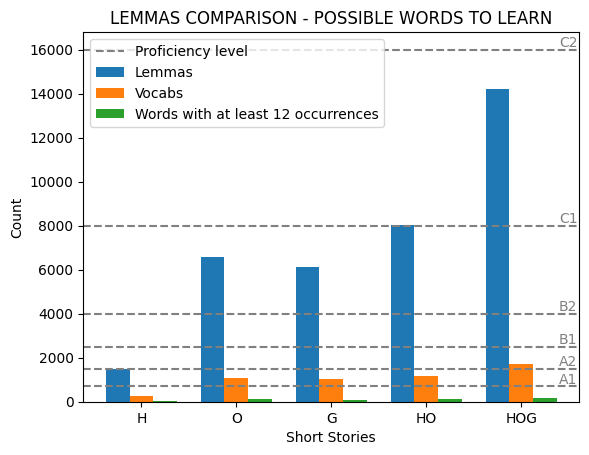

In [41]:
# Data
texts = ['H', 'O', 'G', 'HO', 'HOG']
lemmas = [len(lemmasH), len(lemmasO), len(lemmasG), len(combinedLemmasOH), len(combinedLemmas)]
vocab = [len(vocabH), len(vocabO), len(vocabG), len(combinedVocabOH), len(combinedVocab)]
filteredLemmas = [len(filteredLemmasH), len(filteredLemmasO), len(filteredLemmasG), len(combinedFilteredLemmasOH), len(combinedFilteredLemmas)]

# Bars
barWidth = 0.25

r1 = range(len(texts))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Plotting
plt.bar(r1, lemmas, width=barWidth, label='Lemmas')
plt.bar(r2, vocab, width=barWidth, label='Vocabs')
plt.bar(r3, filteredLemmas, width=barWidth, label='Words with at least 12 occurrences')

# Add a dashed line to identify each proficiency level
plt.axhline(700, ls='--', color='gray', label='Proficiency level')
plt.text(4.65, 700, 'A1', color='gray', va='bottom')

plt.axhline(1500, ls='--', color='gray')
plt.text(4.65, 1500, 'A2', color='gray', va='bottom')

plt.axhline(2500, ls='--', color='gray')
plt.text(4.65, 2500, 'B1', color='gray', va='bottom')

plt.axhline(4000, ls='--', color='gray')
plt.text(4.65, 4000, 'B2', color='gray', va='bottom')

plt.axhline(8000, ls='--', color='gray')
plt.text(4.65, 8000, 'C1', color='gray', va='bottom')

plt.axhline(16000, ls='--', color='gray')
plt.text(4.65, 16000, 'C2', color='gray', va='bottom')

# Insert the legend in the graph
plt.xlabel('Short Stories')
plt.ylabel('Count')
plt.title('LEMMAS COMPARISON - POSSIBLE WORDS TO LEARN')
plt.xticks([r + barWidth for r in range(len(texts))], texts)
plt.legend()

plt.show()

> Note how **G** still contains *less vocabulary variety* than **O**, even though the former was rated *0.20 points more difficult* in terms of readability.

## 7.2 IS CONSUMING CONTENT IN THE TARGET LANGUAGE AN EFFICIENT WAY TO ACQUIRE THE LANGUAGE?

This chart allows us to finally address our **initial question**:
*Is consuming content in a foreign language truly an **efficient** method for language acquisition?*

From the perspective of **passive learning**, the answer is quite clearly **NO**.
Even in the case of **active study**, the number of new words encountered — compared to the total number of words read — remains **very low**.

However, this leads to a new and arguably more important question:

> *Would increasing the “efficiency” of this method result in a decrease in actual content consumption?*

After all, encountering a greater number of new words would also imply a **higher level of effort** required to understand the text — which might, in turn, discourage reading altogether.

